### ZScore - Normal Distribution(ND)
https://www.youtube.com/watch?v=OnPE-Z8jtqM
- We apply this method when the column we are working on is distributed normally or almost normal.
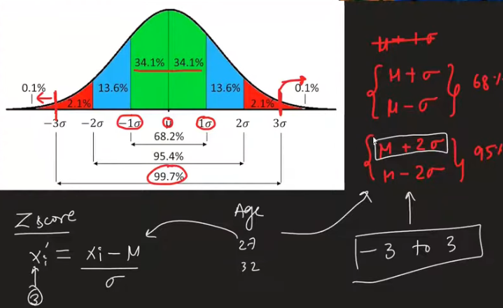
- 99.7% data is between the range (Mean-3SD) Or (Mean+3SD)
- Any value outside this range is called as Outlier.
- Z-scores: Any value in a normal distribution can be converted between -3 and +3 using Z score. This is done typically for each comparision of two or more normally distributed datasets. Also, when we do (Mean-3SD) Or (Mean+3SD), the returned value will be between the range, -3 to 3, hence we use Z Score.
- <b>After applying z score, any value beyond -3 and +3 is considered outlier.
- Treat the outliers by using Trimming or Capping

In [311]:
import pandas as pd
Placement_DF = pd.read_csv(r"C:\Users\ACER\Desktop\Kranthi\DataScience_Desktop\MachineLearningFiles\placement2.csv")
Placement_DF.shape

(1000, 3)

<Axes: xlabel='placement_exam_marks', ylabel='Count'>

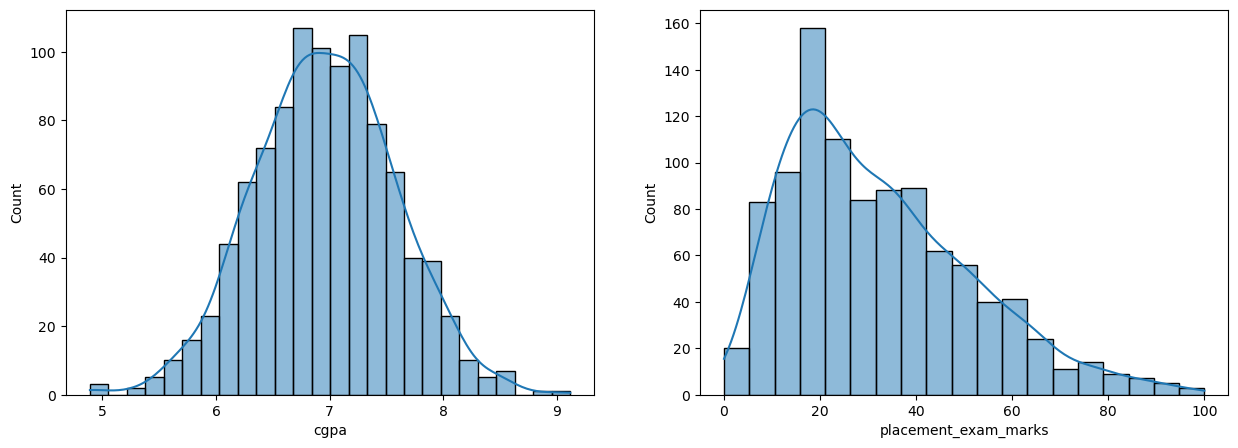

In [313]:
# Draw a distribution plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x = Placement_DF.cgpa, kde=True)

plt.subplot(1,2,2)
sns.histplot(x = Placement_DF.placement_exam_marks, kde=True)
# From the below charts, we can understand that cgpa is normally distributed whereas placement_exam_marks is skewed.

In [314]:
# In this example, we will handle outliers in cgpa column only using Z score

In [317]:
# Calculate Mean, SD, Min and Max values from the cgpa column
Mean = Placement_DF.cgpa.mean()
SD = Placement_DF.cgpa.std()
print("Mean of cgpa is ", Mean)
print("SD of cgpa is ", SD)

Mean of cgpa is  6.96124
SD of cgpa is  0.6158978751323894


In [319]:
# Finding the boundary values based on Mean, SD, Min and Max values

Highest_Allowed_Value = Mean + (3*SD)
Lowest_Allowed_Value = Mean - (3*SD)

print("Min value in cgpa column is ", Placement_DF.cgpa.min())
print("Lowest allowed value Mean-3*SD = ",Lowest_Allowed_Value)

print("Max value in cgpa column is ", Placement_DF.cgpa.max())
print("Highest allowed value Mean+3*SD = ",Highest_Allowed_Value)

Min value in cgpa column is  4.89
Lowest allowed value Mean-3*SD =  5.113546374602832
Max value in cgpa column is  9.12
Highest allowed value Mean+3*SD =  8.808933625397168


In [321]:
# We can see there are values less than and greater than the threshold values.
# Detect the outliers based on highest and lowest values as per  (Mean + 3SD) Or (Mean - 3SD)

Placement_DF[(Placement_DF.cgpa > 8.80) | (Placement_DF.cgpa < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### Remove outliers using Trimming - Drop the records

In [324]:
# Approach 1 - by using Mean and SD formula - (Mean-3*SD) and (Mean+3*SD)
# Get only those recods where the cgpa is between Mean-3*SD = 5.11 and Mean+3*SD = 8.8

Placement_DF_TrimmedOutliers_MSD = Placement_DF[(Placement_DF.cgpa > 5.11) & (Placement_DF.cgpa < 8.8)]
Placement_DF_TrimmedOutliers_MSD.shape

(995, 3)

In [326]:
# Approach 2 - by calculating ZScore for each value of cgpa [ Z Score Formula = (Xi - MeanX)/SD ]
# Then filter the records that have cgpa >-3 and <+3

# Create a new column on the Original dataframe
Placement_DF['CGPA_Zscore'] = (Placement_DF.cgpa - Mean)/SD
Placement_DF.head(3)

,cgpa,placement_exam_marks,placed,CGPA_Zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701


In [328]:
# To find outliers, filter the records whose CGPA_Zscore <-3 and >+3

Placement_DF[(Placement_DF.CGPA_Zscore < -3) | (Placement_DF.CGPA_Zscore > 3)]

,cgpa,placement_exam_marks,placed,CGPA_Zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [330]:
# Drop the outlier records and get only the normal cgpa records

Placement_DF_TrimmedOutliers_ZScore = Placement_DF[(Placement_DF.CGPA_Zscore > -3) & (Placement_DF.CGPA_Zscore < 3)]
Placement_DF_TrimmedOutliers_ZScore.shape

(995, 4)

### Cap the outliers using Min and Max Value - Do not drop but replace the outliers with min and max values

In [333]:
# Calculate the highest and lowest value using the Mean and SD formula

Mean = Placement_DF.cgpa.mean()
SD = Placement_DF.cgpa.std()

Highest_Allowed_Value = Mean + (3*SD)
Lowest_Allowed_Value = Mean - (3*SD)

print("Highest ",Highest_Allowed_Value)
print("Lowest ",Lowest_Allowed_Value)

Highest  8.808933625397168
Lowest  5.113546374602832


In [335]:
# Replace the outliers using the max and min values

# First find the outlier records
Placement_DF[(Placement_DF.cgpa > Highest_Allowed_Value) | (Placement_DF.cgpa < Lowest_Allowed_Value)]

,cgpa,placement_exam_marks,placed,CGPA_Zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [337]:
# Create a copy of Placement_DF and add Capped_CGPA column

Placement_DF_New = Placement_DF.copy()
Placement_DF_New['Capped_CGPA'] = Placement_DF.cgpa

In [339]:
# Now replace the lower and higher values on outliers.

# np.where(condition, If_True, IF_False)
# np.where(a < 5, a, 10*a)

import numpy as np

Placement_DF_New['Capped_CGPA'] = np.where(Placement_DF.cgpa < Lowest_Allowed_Value, Lowest_Allowed_Value, 
    np.where(Placement_DF.cgpa > Highest_Allowed_Value,Highest_Allowed_Value,Placement_DF.cgpa))

In [341]:
# Check the replaced Capped values.

Placement_DF_New[(Placement_DF_New.cgpa > Highest_Allowed_Value) | (Placement_DF_New.cgpa < Lowest_Allowed_Value)]

,cgpa,placement_exam_marks,placed,CGPA_Zscore,Capped_CGPA
485,4.92,44.0,1,-3.314251,5.113546
995,8.87,44.0,1,3.099150,8.808934
996,9.12,65.0,1,3.505062,8.808934
997,4.89,34.0,0,-3.362960,5.113546
999,4.90,10.0,1,-3.346724,5.113546


In [343]:
Placement_DF_New.Capped_CGPA.describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: Capped_CGPA, dtype: float64